**Q1: Identify missing or incorrect data in the dataset and apply appropriate preprocessing steps to clean it (code and explanation)**

In [4]:
import pandas as pd


df = pd.read_csv('dataset.csv')
print("\nGiven Dataset:-")
print(df)


missing_values = df.isnull().sum()
print("\nBefore removing null values:-")
print(missing_values)

df_cleaned = df.dropna()

print("\nAfter removing null values:-")
print(df_cleaned.isnull().sum())



Given Dataset:-
       species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0       Adelie  Torgersen            39.1           18.7              181.0   
1       Adelie  Torgersen            39.5           17.4              186.0   
2       Adelie  Torgersen            40.3           18.0              195.0   
3       Adelie  Torgersen             NaN            NaN                NaN   
4       Adelie  Torgersen            36.7           19.3              193.0   
..         ...        ...             ...            ...                ...   
339  Chinstrap      Dream            55.8           19.8              207.0   
340  Chinstrap      Dream            43.5           18.1              202.0   
341  Chinstrap      Dream            49.6           18.2              193.0   
342  Chinstrap      Dream            50.8           19.0              210.0   
343  Chinstrap      Dream            50.2           18.7              198.0   

     body_mass_g      sex  
0     

**DATASET DESCRIPTION**
The dataset given Palmer penguin.
Dataset Overview:
Species:
The penguins belong to one of three species: Adelie, Chinstrap, or Gentoo.
Islands:
The penguins were observed on three islands: Biscoe, Dream, and Torgersen.
Key Features:
bill_length_mm:

The length of the penguin's bill (beak) in millimeters.
A continuous numeric feature.
bill_depth_mm:

The depth (height) of the penguin's bill in millimeters.
A continuous numeric feature.
flipper_length_mm:

The length of the penguin's flippers in millimeters.
A continuous numeric feature.
body_mass_g:

The body mass of the penguin in grams.
A continuous numeric feature.
sex:

The sex of the penguin (male or female).
A categorical feature.
island:

The island where the penguin was observed (Biscoe, Dream, or Torgersen).
A categorical feature.
year:

The year the penguin data was collected (2007, 2008, or 2009).
A discrete numeric feature.
Missing or Incomplete Data:
The dataset contains some missing values, especially in features like sex and certain measurements.
It is common to handle missing values through techniques like imputation or removing rows with missing values, as seen in the preprocessing steps.
Usage:
The dataset is used for species classification based on physical measurements (like bill length and body mass).
It serves as an alternative to the Iris dataset for practicing data analysis, visualization, and classification algorithms.
Summary:
The dataset provides key biological metrics that allow for distinguishing between penguin species based on physical characteristics. This makes it suitable for classification problems in machine learning, exploratory data analysis, and visualization. The dataset's simplicity and interpretability have made it popular in teaching and learning contexts.

**Q2: What is the average body_mass_g for Gentoo penguins? (code)**

In [5]:

avg_body_mass = df_cleaned[df_cleaned['species'] == 'Gentoo']['body_mass_g'].mean()
print(f'Average body mass for Gentoo penguins: {avg_body_mass} g')


Average body mass for Gentoo penguins: 5159.151785714285 g


**Q3: How do the distributions of bill_length_mm and bill_depth_mm differ between the three penguin species? Analyze the skewness and kurtosis of each feature for different species. (code and explanation)**

Adelie - Bill Length: Skewness: 0.14785553055324596, Kurtosis: -0.1467776352724548
Adelie - Bill Depth: Skewness: 0.30496283856083595, Kurtosis: -0.09234177872151461
Gentoo - Bill Length: Skewness: 0.6423463223988263, Kurtosis: 1.161794056130394
Gentoo - Bill Depth: Skewness: 0.32456214621312685, Kurtosis: -0.5867590922827879
Chinstrap - Bill Length: Skewness: -0.08954611496766, Kurtosis: -0.03177243746594938
Chinstrap - Bill Depth: Skewness: 0.002885936248547447, Kurtosis: -0.9011113930000443


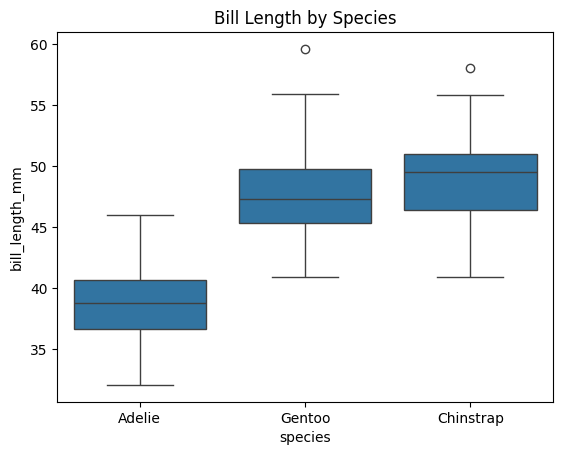

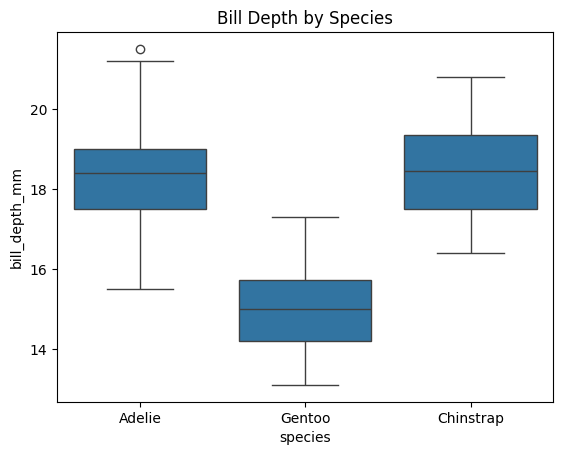

In [6]:
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

# Analyzing skewness and kurtosis
for species in df_cleaned['species'].unique():
    species_data = df_cleaned[df_cleaned['species'] == species]
    skewness_length = stats.skew(species_data['bill_length_mm'])
    kurtosis_length = stats.kurtosis(species_data['bill_length_mm'])
    skewness_depth = stats.skew(species_data['bill_depth_mm'])
    kurtosis_depth = stats.kurtosis(species_data['bill_depth_mm'])
    print(f"{species} - Bill Length: Skewness: {skewness_length}, Kurtosis: {kurtosis_length}")
    print(f"{species} - Bill Depth: Skewness: {skewness_depth}, Kurtosis: {kurtosis_depth}")

# Visualize distributions
sns.boxplot(x='species', y='bill_length_mm', data=df_cleaned)
plt.title('Bill Length by Species')
plt.show()

sns.boxplot(x='species', y='bill_depth_mm', data=df_cleaned)
plt.title('Bill Depth by Species')
plt.show()


**EXPLANATION**
Skewness measures the asymmetry of the data distribution.
Positive skew indicates that the right tail (larger values) is longer or fatter.
Negative skew means the left tail (smaller values) is longer.
Skewness values close to 0 indicate that the distribution is relatively symmetrical.
Kurtosis measures the "tailedness" of the distribution.
High kurtosis means more of the variance is due to infrequent extreme deviations.
Low kurtosis indicates a flatter distribution with fewer outliers.

**Q4: Identify which features in the dataset have outliers. Provide the method used to detect them and visualize the outliers. (code and explanation)**

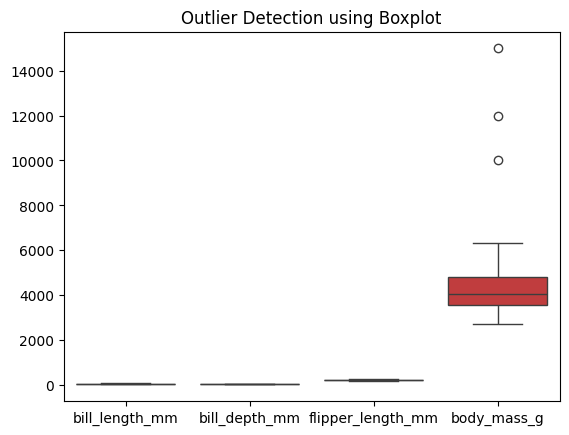

In [10]:
import pandas as pd

numeric_cols = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

for col in numeric_cols:
    df_cleaned.loc[:, col] = pd.to_numeric(df_cleaned[col], errors='coerce')

df_cleaned = df_cleaned.dropna(subset=numeric_cols)

Q1 = df_cleaned[numeric_cols].quantile(0.25)
Q3 = df_cleaned[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

outliers = df_cleaned[((df_cleaned[numeric_cols] < (Q1 - 1.5 * IQR)) |
                       (df_cleaned[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df_cleaned[numeric_cols])
plt.title('Outlier Detection using Boxplot')
plt.show()


**EXPLANATION**
The IQR method is used to detect outliers in the numeric columns (bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g).
The boxplot visualization provides a graphical way to see the distribution and outliers. Values outside the whiskers are flagged as outliers, which is particularly useful in understanding the spread and potential anomalies in the data.

**Q5: Does this dataset contribute to the curse of dimensionality? If yes perform PCA. (code and explanation required)**

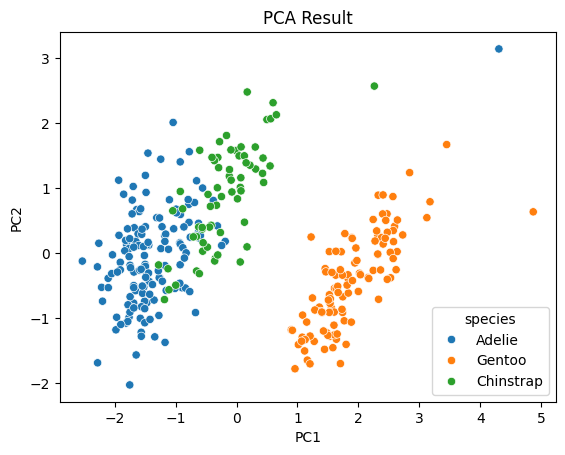

In [11]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Features to normalize and apply PCA
features = df_cleaned[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)

# Create a DataFrame with PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['species'] = df_cleaned['species'].values

# Visualize PCA results
sns.scatterplot(x='PC1', y='PC2', hue='species', data=pca_df)
plt.title('PCA Result')
plt.show()


**EXPLANATION**
PCA Interpretation:
Principal Component Analysis (PCA) reduces the dimensionality of the dataset while retaining as much variance as possible. The first principal component (PC1) captures the largest amount of variance, and the second principal component (PC2) captures the second-largest variance.
In this case, PCA helps us visualize the penguin dataset in two dimensions, allowing us to see how the species cluster based on the given features.
Why PCA is used here:
PCA is performed to address the curse of dimensionality, which refers to the challenges faced when analyzing data in high-dimensional spaces. By reducing the dimensionality, we retain the essential structure of the data while eliminating noise or irrelevant variance, making it easier to visualize and analyze.








**Q6: Use bill_length_mm vs bill_depth_mm and plot 7 different graphs to visualize them. (code)**

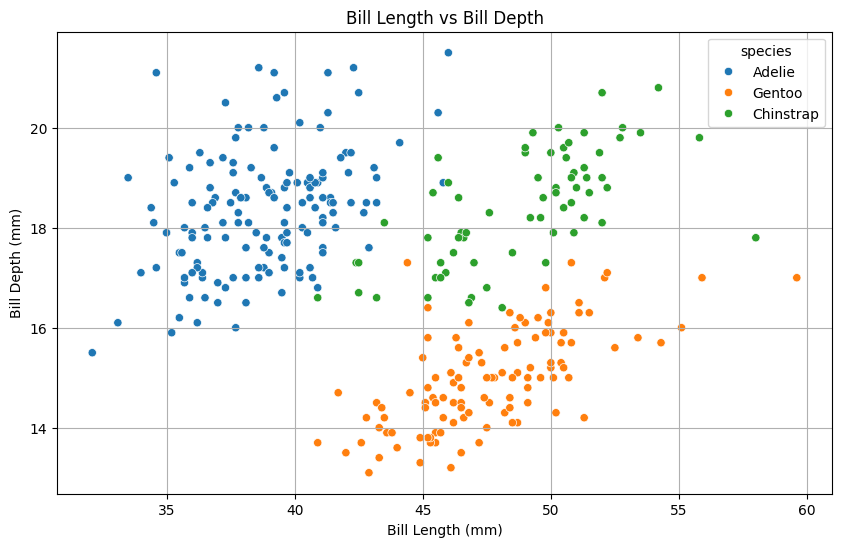

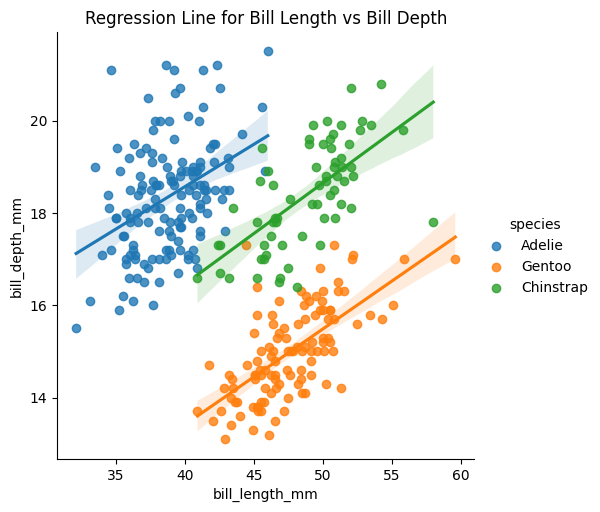

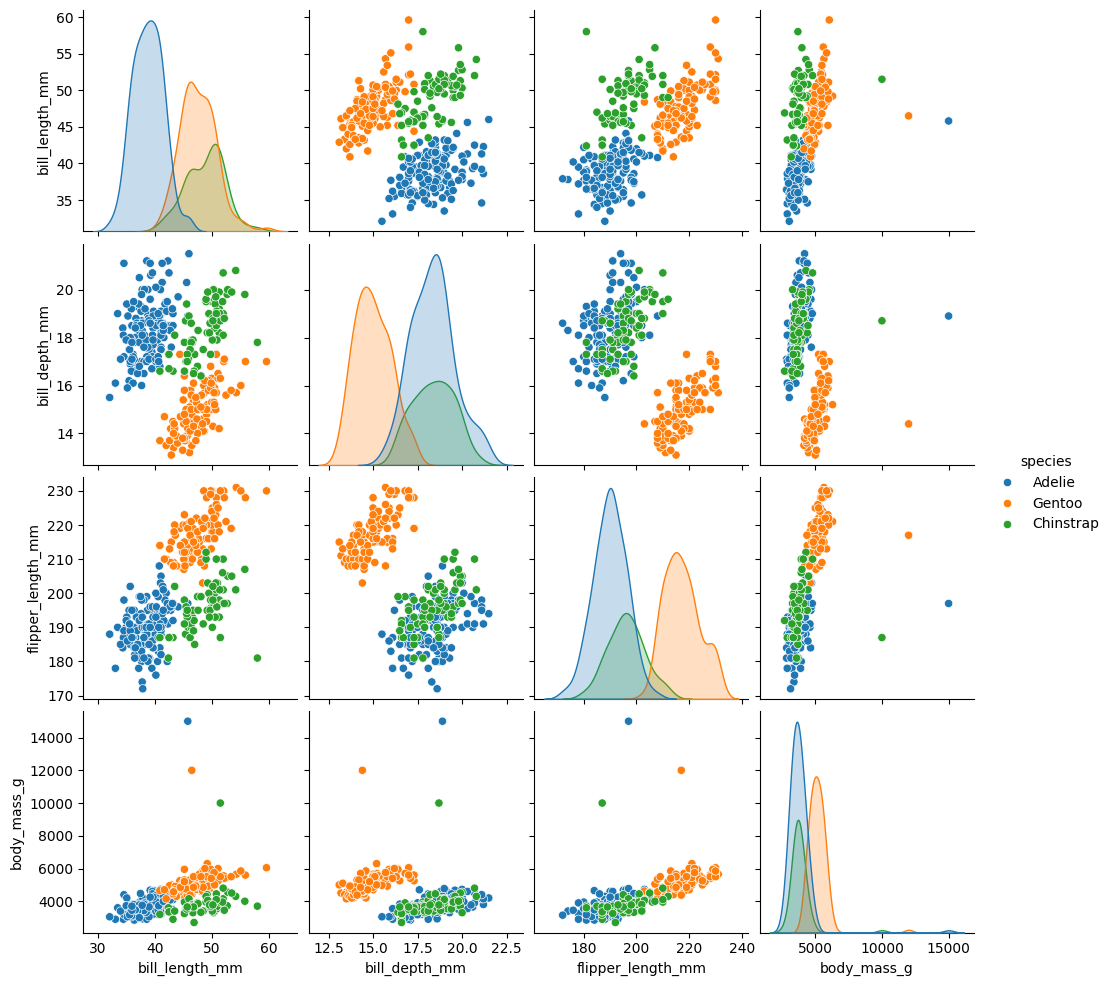

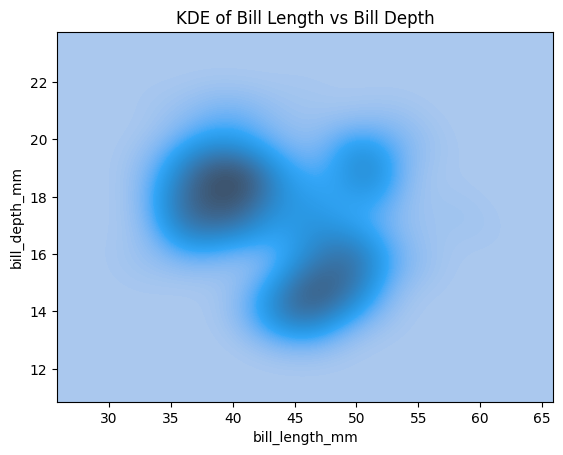

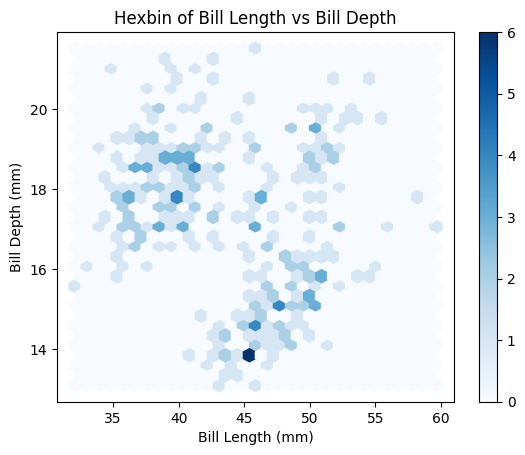

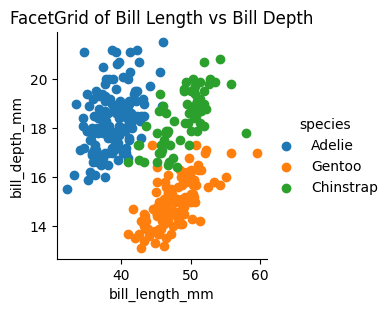

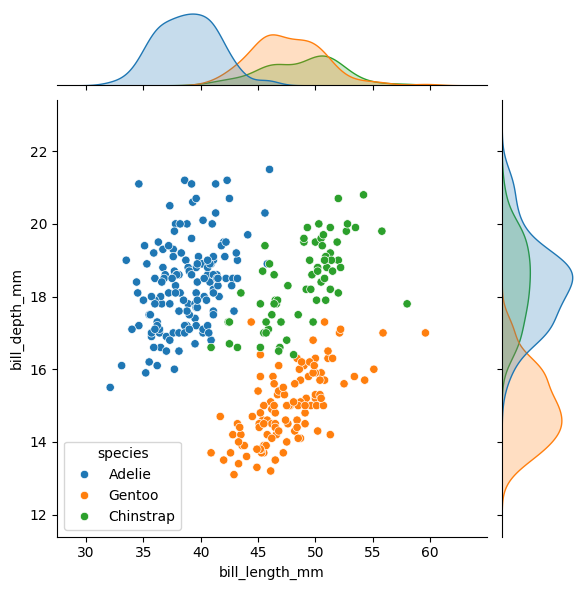

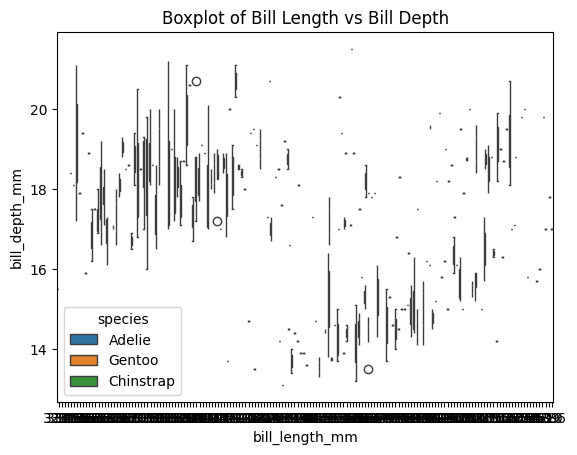

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bill_length_mm', y='bill_depth_mm', hue='species', data=df_cleaned)
plt.title('Bill Length vs Bill Depth')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.grid(True)
plt.show()

# Additional visualizations can include:
# 1. Regression line
sns.lmplot(x='bill_length_mm', y='bill_depth_mm', hue='species', data=df_cleaned)
plt.title('Regression Line for Bill Length vs Bill Depth')
plt.show()

# 2. Pairplot
sns.pairplot(df_cleaned, hue='species')
plt.show()

# 3. KDE plot
sns.kdeplot(data=df_cleaned, x='bill_length_mm', y='bill_depth_mm', fill=True, thresh=0, levels=100)
plt.title('KDE of Bill Length vs Bill Depth')
plt.show()

# 4. Hexbin plot
plt.hexbin(df_cleaned['bill_length_mm'], df_cleaned['bill_depth_mm'], gridsize=30, cmap='Blues')
plt.colorbar()
plt.title('Hexbin of Bill Length vs Bill Depth')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.show()

# 5. FacetGrid
g = sns.FacetGrid(df_cleaned, hue='species')
g.map(plt.scatter, 'bill_length_mm', 'bill_depth_mm')
g.add_legend()
plt.title('FacetGrid of Bill Length vs Bill Depth')
plt.show()

# 6. Jointplot
sns.jointplot(x='bill_length_mm', y='bill_depth_mm', data=df_cleaned, hue='species', kind='scatter')
plt.show()

# 7. Boxplot
sns.boxplot(x='bill_length_mm', y='bill_depth_mm', hue='species', data=df_cleaned)
plt.title('Boxplot of Bill Length vs Bill Depth')
plt.show()


**Q7: Find the maximum flipper_length_mm for each combination of species and island. Which species has the longest flippers on each island? (code)**

In [13]:
max_flipper = df_cleaned.groupby(['species', 'island'])['flipper_length_mm'].max().reset_index()
print(max_flipper)

# Identify species with the longest flippers on each island
longest_flippers = max_flipper.loc[max_flipper.groupby('island')['flipper_length_mm'].idxmax()]
print(longest_flippers)


     species     island  flipper_length_mm
0     Adelie     Biscoe              203.0
1     Adelie      Dream              208.0
2     Adelie  Torgersen              202.0
3  Chinstrap      Dream              212.0
4     Gentoo     Biscoe              231.0
     species     island  flipper_length_mm
4     Gentoo     Biscoe              231.0
3  Chinstrap      Dream              212.0
2     Adelie  Torgersen              202.0


**EXPLANATION**
Step 1: The first part calculates the maximum flipper length for each species on each island. For example, for "Biscoe", the maximum flipper length of the "Gentoo" penguin might be 230 mm.

Step 2: The second part identifies the species with the longest flippers per island by comparing the maximum flipper lengths within each island group. For instance, if "Gentoo" has the longest flippers on "Biscoe", it will be included in the final result.

**Q8: Perform z-score normalization on this dataset. (code)**

In [14]:
from scipy.stats import zscore

# Apply z-score normalization
df_normalized = df_cleaned.copy()
df_normalized[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']] = df_cleaned[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']].apply(zscore)

# View the normalized data
print(df_normalized.head())


  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen       -0.873115       0.768343          -1.415643   
1  Adelie  Torgersen       -0.800309       0.104774          -1.056111   
2  Adelie  Torgersen       -0.654696       0.411037          -0.408954   
4  Adelie  Torgersen       -1.309955       1.074606          -0.552767   
5  Adelie  Torgersen       -0.836712       1.738175          -0.768486   

   body_mass_g     sex  
0    -0.459514    male  
1    -0.415366  female  
2    -0.900986  female  
4    -0.724397  female  
5    -0.547808    male  


**EXPLANATION**
After normalization, the data will be in a comparable scale where all features are centered around 0 and have unit variance. This is particularly useful when you plan to apply algorithms like Principal Component Analysis (PCA) or clustering, which assume that all features contribute equally to the model.

